In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/laptop_price.csv", encoding='latin-1', index_col='laptop_ID')
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36kg,889.0
835,Asus,ZenBook Flip,2 in 1 Convertible,13.3,Touchscreen / Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.1kg,1358.0
486,Toshiba,Portege X30-D-10J,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,1672.0


In [3]:
df.isnull().mean()*100

Company             0.0
Product             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price_euros         0.0
dtype: float64

In [4]:
df.shape

(1303, 12)

In [5]:
df.duplicated().sum()

28

In [6]:
df = df.drop_duplicates()

In [7]:
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1006,Lenovo,V110-15IAP (N3350/4GB/128GB/No,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,128GB SSD,Intel HD Graphics 500,No OS,1.9kg,270.62
530,HP,ProBook 440,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.63kg,689.00
764,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i5 6260U 1.8GHz,8GB,256GB SSD,Intel HD Graphics 540,Windows 10,1.3kg,1199.00


In [8]:
df['Ram'] = df['Ram'].str.replace("GB", "")
df['Weight'] = df["Weight"].str.replace("kg", "")
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,2.4,1599.0
1248,Lenovo,ThinkPad Yoga,Netbook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.50GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,1650.0
1058,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.54,1000.0


In [9]:
df['Ram'] = df['Ram'].astype("int32")
df['Weight'] = df['Weight'].astype("float32")
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
206,Acer,Aspire E5-576G,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.23,742.00
961,Lenovo,IdeaPad 310-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 920MX,No OS,2.20,685.00
1069,HP,ProBook 650,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.31,705.15


In [10]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         263
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [11]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
laptop_ID,,,,,,,,,,,,,
494,Dell,XPS 15,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,1899.00,0
767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2868.99,0
269,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R5 M430,Windows 10,2.24,565.00,0


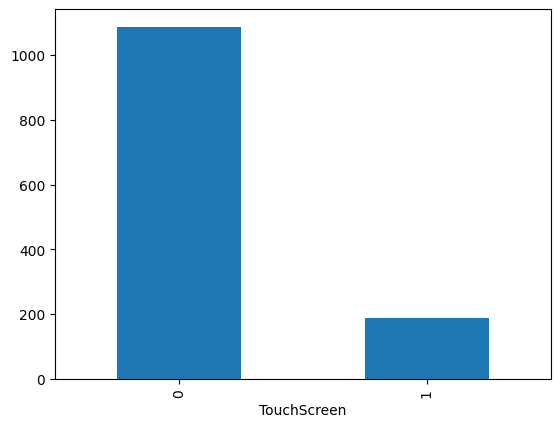

In [12]:
df['TouchScreen'].value_counts().plot(kind='bar')
plt.show()

In [13]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if "IPS" in x else 0)
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS
laptop_ID,,,,,,,,,,,,,,
426,Lenovo,ThinkPad E480,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon RX 550,Windows 10,1.75,1215.38,0,1
399,Acer,Aspire 5,Notebook,15.6,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,693.99,0,1
428,Chuwi,LapBook 12.3,Notebook,12.3,IPS Panel Retina Display 2736x1824,Intel Celeron Quad Core N3450 1.1GHz,6,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.40,449.00,0,1


In [14]:
df['Full_HD'] = df['ScreenResolution'].apply(lambda x: 1 if "Full HD" in x else 0)
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD
laptop_ID,,,,,,,,,,,,,,,
535,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,AMD Radeon R5 M430,Windows 10,2.30,585.0,0,0,1
628,Lenovo,ThinkPad T470,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.65,1465.0,0,0,1
784,Asus,Q524UQ-BHI7T15 (i7-7500U/12GB/2TB/GeForce,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,2TB HDD,Nvidia GeForce 940MX,Windows 10,2.30,839.0,1,0,1


In [15]:
df['Price_euros'].corr(df['Full_HD'])

0.18926001213643806

In [16]:
new_res = df['ScreenResolution'].str.split('x', n=2, expand=True)
new_res

,0,1
laptop_ID,,
1,IPS Panel Retina Display 2560,1600
2,1440,900
3,Full HD 1920,1080
4,IPS Panel Retina Display 2880,1800
5,IPS Panel Retina Display 2560,1600
...,...,...
1288,IPS Panel Full HD / Touchscreen 1920,1080
1289,IPS Panel Quad HD+ / Touchscreen 3200,1800
1290,1366,768


In [17]:
new_res[0]=new_res[0].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
new_res

,0,1
laptop_ID,,
1,2560,1600
2,1440,900
3,1920,1080
4,2880,1800
5,2560,1600
...,...,...
1288,1920,1080
1289,3200,1800
1290,1366,768


In [18]:
df['x_res'] = new_res[0].astype('int')
df['y_res'] = new_res[1].astype('int')
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,x_res,y_res
laptop_ID,,,,,,,,,,,,,,,,,
79,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,Intel UHD Graphics 620,Windows 10,2.02,855.0,0,0,1,1920,1080
375,HP,Elitebook 1040,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,1750.0,0,1,1,1920,1080
1243,Asus,X540SA-RBPDN09 (N3710/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,2.65,309.0,0,0,0,1366,768


In [19]:
df['PPI'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype("float")
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,x_res,y_res,PPI
laptop_ID,,,,,,,,,,,,,,,,,,
842,Lenovo,Thinkpad T460,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.70,1186.0,0,0,1,1920,1080,157.350512
998,Toshiba,Tecra A40-C-1KF,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.75,915.0,0,0,0,1366,768,111.935204
143,Acer,Aspire 5,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Nvidia GeForce MX130,Windows 10,3.00,655.0,0,1,1,1920,1080,127.335675


In [20]:
df.drop(columns=['ScreenResolution', 'x_res', 'y_res'], inplace=True)
df.sample(3)

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI
laptop_ID,,,,,,,,,,,,,,,
1144,HP,Omen -,Gaming,17.3,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.35,1129.0,0,1,1,127.335675
1112,MSI,GS70 Stealth,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.60,1599.0,0,0,1,127.335675
128,HP,250 G6,Notebook,15.6,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,No OS,1.86,259.0,0,0,0,100.454670


In [21]:
df['CPU_Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[:3]))
df.sample(3)

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Name
laptop_ID,,,,,,,,,,,,,,,,
771,Google,Pixelbook (Core,Ultrabook,12.3,Intel Core i5 7Y57 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Chrome OS,1.10,1559.0,1,0,0,234.507400,Intel Core i5
431,Dell,Alienware 17,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2799.0,0,1,0,169.780899,Intel Core i7
500,Acer,Aspire 5,Notebook,15.6,AMD A10-Series 9620P 2.5GHz,8,1TB HDD,AMD Radeon RX 540,Windows 10,2.20,579.0,0,0,0,100.454670,AMD A10-Series 9620P


In [22]:
def processor(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    elif text.split()[0] == "Intel":
        return "Other Intel Processor"
    else:
        return "AMD Processor"

In [23]:
df['CPU_Brand'] = df['CPU_Name'].apply(processor)
df.sample(3)

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Name,CPU_Brand
laptop_ID,,,,,,,,,,,,,,,,,
1028,HP,Probook 430,Notebook,13.3,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.49,800.0,0,0,0,117.826530,Intel Core i3,Intel Core i3
1084,Apple,"MacBook 12""",Ultrabook,12.0,Intel Core M 1.1GHz,8,256GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.92,1300.0,0,1,0,226.415547,Intel Core M,Other Intel Processor
579,HP,15-cd005nv (A9-9420/6GB/256GB/Radeon,Notebook,15.6,AMD A9-Series A9-9420 3GHz,6,256GB SSD,AMD Radeon 530,Windows 10,1.95,649.0,0,1,1,141.211998,AMD A9-Series A9-9420,AMD Processor


In [24]:
df = df.drop(columns=["CPU_Name"])
df.sample(3)

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand
laptop_ID,,,,,,,,,,,,,,,,
559,Dell,Alienware 17,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2699.0,0,1,1,127.335675,Intel Core i7
821,Samsung,Notebook 9,Ultrabook,13.3,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,0.81,1499.0,0,0,1,165.632118,Intel Core i5
179,Dell,Inspiron 3567,Notebook,15.6,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,459.0,0,0,0,100.454670,Intel Core i3


In [25]:
df = df.drop("Cpu", axis=1)
df.sample(3)

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand
laptop_ID,,,,,,,,,,,,,,,
470,Lenovo,IdeaPad 510s-14IKB,Notebook,14.0,8,512GB SSD,AMD Radeon R7 M460,No OS,1.50,799.0,0,1,1,157.350512,Intel Core i7
690,Dell,Alienware 15,Gaming,15.6,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.21,2051.0,0,0,1,141.211998,Intel Core i5
532,Lenovo,ThinkPad L470,Notebook,14.0,8,256GB SSD,Intel HD Graphics 520,Windows 7,2.02,1340.0,0,0,1,157.350512,Intel Core i5


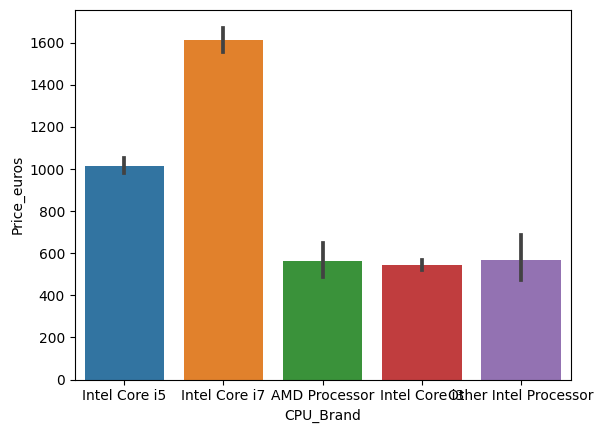

In [26]:
sns.barplot(x=df['CPU_Brand'], y=df['Price_euros'])
plt.show()

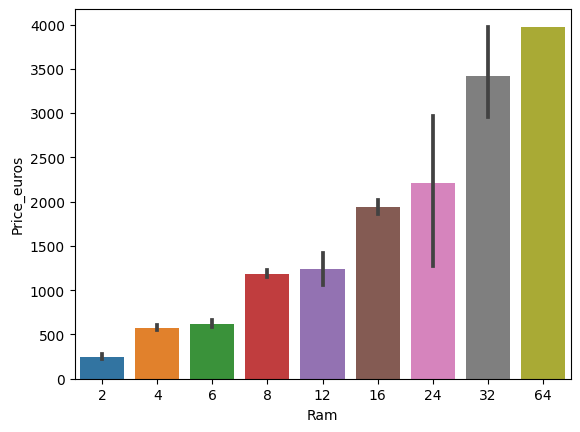

In [27]:
sns.barplot(x=df['Ram'], y=df['Price_euros'])
plt.show()

In [28]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace("GB", "")
df['Memory'] = df['Memory'].str.replace("TB", "000")
new = df['Memory'].str.split("+", n=1, expand=True)

df['first'] = new[0]
df['first'] = df['first'].str.strip()

df['second'] = new[1]

df['Layer1HDD']    = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD']    = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash']  = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df['second'].fillna('0', inplace=True)

df['Layer2HDD']    = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SSD']    = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2Flash']  = df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df['first'] = df['first'].astype('int')
df['second'] = df['second'].astype('int')

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash"]=(df["first"]*df["Layer1Flash"]+df["second"]*df["Layer2Flash"])

df.drop(columns=['Memory','first', 'second','Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash', 'Layer2HDD', 'Layer2SSD', 'Layer2Flash', 'Layer2Hybrid'], inplace=True)
df.sample(3)

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand,HDD,SSD,Hybrid,Flash
laptop_ID,,,,,,,,,,,,,,,,,,
1138,Dell,Latitude E5570,Notebook,15.6,4,Intel HD Graphics 520,Linux,2.09,523.63,0,0,0,100.454670,Intel Core i5,500,0,0,0
390,Asus,Zenbook Flip,Ultrabook,13.3,16,Intel HD Graphics 620,Windows 10,1.10,1748.90,1,0,1,165.632118,Intel Core i7,0,512,0,0
780,Samsung,Notebook 9,2 in 1 Convertible,15.0,16,AMD Radeon 540,Windows 10,1.71,1799.00,1,0,1,146.860478,Intel Core i7,0,256,0,0


In [29]:
# Useless memories
df = df.drop("Hybrid", axis=1)
df = df.drop("Flash", axis=1)

In [30]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [31]:
df['GPU_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df.sample(3)

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand,HDD,SSD,GPU_Brand
laptop_ID,,,,,,,,,,,,,,,,,
1130,Dell,XPS 13,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.0,0,0,1,165.632118,Intel Core i7,0,256,Intel
1114,Asus,G752VY-GC162T (i7-6700HQ/16GB/1TB,Gaming,17.3,16,Nvidia GeForce GTX 980M,Windows 10,4.30,2299.0,0,1,1,127.335675,Intel Core i7,1000,128,Nvidia
1140,Lenovo,ThinkPad Yoga,2 in 1 Convertible,14.0,8,Intel HD Graphics 520,Windows 10,1.80,1669.0,1,1,1,157.350512,Intel Core i7,0,256,Intel


In [32]:
df['GPU_Brand'].value_counts()

GPU_Brand
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [33]:
df = df[df["GPU_Brand"] != "ARM"]


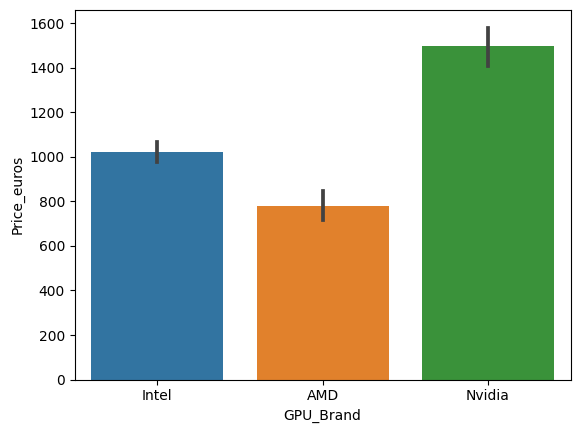

In [34]:
sns.barplot(x=df['GPU_Brand'], y=df['Price_euros'])
plt.show()

In [35]:
df = df.drop("Gpu", axis=1)

In [36]:
df.sample(3)

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand,HDD,SSD,GPU_Brand
laptop_ID,,,,,,,,,,,,,,,,
155,Lenovo,V110-15IKB (i5-7200U/4GB/128GB/W10),Notebook,15.6,4,Windows 10,1.90,498.0,0,0,0,100.454670,Intel Core i5,0,128,Intel
1213,HP,Pavilion Power,Notebook,15.6,12,Windows 10,2.21,1327.0,0,1,1,141.211998,Intel Core i7,1000,128,Nvidia
34,Dell,XPS 13,Ultrabook,13.3,16,Windows 10,1.20,1869.0,1,0,0,276.053530,Intel Core i7,0,512,Intel


In [37]:
def find_os(os):
    if os in ['Windows 10', 'Windows 7', 'Windows 10 S']:
        return "Windows"
    elif os in ['macOS', 'Mac OS X']:
        return "Mac"
    else:
        return "Linux/No OS/Others"

In [38]:
df["OpSys"] = df['OpSys'].apply(find_os)

In [39]:
df.sample(3)

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand,HDD,SSD,GPU_Brand
laptop_ID,,,,,,,,,,,,,,,,
1262,HP,EliteBook 840,Notebook,14.0,4,Windows,1.54,1099.99,0,0,1,157.350512,Intel Core i5,0,256,Intel
321,HP,Spectre x360,2 in 1 Convertible,13.3,16,Windows,1.29,2449.00,1,1,0,331.264236,Intel Core i7,0,1000,Intel
15,Apple,"MacBook 12""",Ultrabook,12.0,8,Mac,0.92,1262.40,0,1,0,226.415547,Other Intel Processor,0,256,Intel


In [40]:
df = df.drop("Product", axis = 1)
df.sample(3)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand,HDD,SSD,GPU_Brand
laptop_ID,,,,,,,,,,,,,,,
1241,Dell,Ultrabook,12.5,8,Windows,1.26,1713.37,1,0,1,176.232574,Intel Core i5,0,256,Intel
436,Mediacom,2 in 1 Convertible,11.6,4,Windows,1.16,299.00,1,1,1,189.905791,Other Intel Processor,0,32,Intel
445,Lenovo,Ultrabook,14.0,24,Windows,1.32,2382.00,0,0,0,209.800683,Intel Core i7,0,512,Intel


In [41]:
df.drop(columns=['Inches', "Full_HD"], inplace=True)
df.sample(2)

,Company,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,GPU_Brand
laptop_ID,,,,,,,,,,,,,
1151,HP,Workstation,8,Windows,3.00,3949.4,0,1,127.335675,Intel Core i7,0,256,Nvidia
880,Dell,Workstation,8,Windows,2.23,1778.0,0,0,141.211998,Intel Core i7,1000,0,Nvidia


In [42]:
df['Price'] = df['Price_euros']
df.drop("Price_euros", axis = 1, inplace = True)

In [43]:
df_x_train = df.iloc[:, :-1]

In [44]:
df_x = df.iloc[:, :-1].values

In [45]:
df_y = np.log(df['Price']).values

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=17, test_size=0.2)

In [47]:
s1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

s2 = LinearRegression()

pipe=Pipeline([
    ("Step1",s1),
    ("Step2",s2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mean_absolute_error(y_pred, y_test)

C:\Users\mahgo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.2166337820737507